# Imports thư viện

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Fake_NewJob

/content/drive/MyDrive/Fake_NewJob


## Import thư viện

In [ ]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score
from scipy.sparse import hstack,csr_matrix
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Input
from sklearn import preprocessing
from tensorflow.keras.models import Model
import scipy.sparse as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import learning_curve,cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# pd.options.mode.chained_assignment = None

# Data Exploration

### Đọc dữ liệu

In [ ]:
df = pd.read_csv('fake_job_postings.csv')

In [ ]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.shape

(17880, 18)

In [ ]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [ ]:
print(len(categorical))
print(categorical)

13
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [ ]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [ ]:
df[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df[numerical][df[numerical]=='?'].count()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [ ]:
df[categorical][df[categorical]=='?'].count()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
dtype: int64

<Axes: >

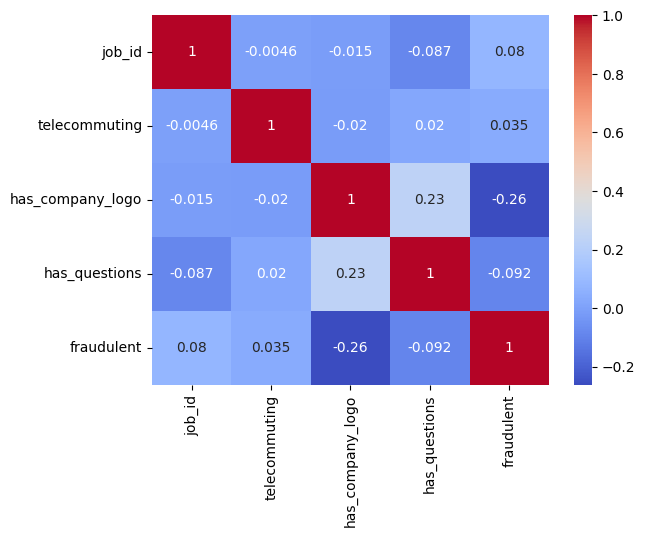

In [ ]:
sns.heatmap(df[numerical].corr(), cmap='coolwarm', annot=True)

### Xóa cột `telecommuting` và `has_questions`

In [ ]:
numerical_to_drop=['telecommuting','has_questions']

df.drop(columns=numerical_to_drop, inplace=True)

In [ ]:
df.shape

(17880, 16)

### Loại bỏ những trường hợp `has_company_logo` = 0

In [ ]:
df=df[df['has_company_logo']>0.0]

### Xác định country bằng location

In [ ]:
df['country'] = df['location'].str.split(',').str[0]

In [ ]:
df.nunique()

job_id                 14220
title                   9091
location                2393
department              1078
salary_range             659
company_profile         1579
description            11723
requirements            9812
benefits                5095
has_company_logo           1
employment_type            5
required_experience        7
required_education        13
industry                 129
function                  37
fraudulent                 2
country                   86
dtype: int64

<ipython-input-235-d1ff3d41137a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='fraudulent',palette='rainbow')


<Axes: xlabel='fraudulent', ylabel='count'>

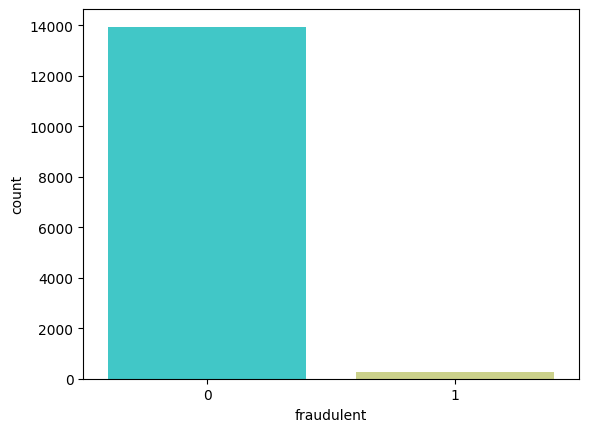

In [ ]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

### Dữ liệu khá mất cân bằng về fake và real

In [ ]:
fake=df[df['fraudulent']==1]
fake.shape

(283, 17)

In [ ]:
real=df[df['fraudulent']==0].reset_index(drop = True)
real.shape

(13937, 17)

In [ ]:
real=df[df['fraudulent']==0].reset_index(drop = True)

real.drop(real.index[283:13936],inplace=True)
real

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,1,Other,Internship,NaN,NaN,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,1,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,1,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,332,Application Security Consultant,"US, ,",Professional Services,NaN,Cylance is a global cybersecurity products and...,SummaryImmediate requirement for an advanced s...,QualificationsBachelor degree in Information T...,NaN,1,NaN,NaN,NaN,NaN,NaN,0,US
280,333,TwiML Application Developer - Freelance (Contr...,"US, ,",NaN,NaN,The OneReach team is comprised of a diverse gr...,OneReach has an immediate need for freelance/c...,#NAME?,NaN,1,Contract,NaN,NaN,NaN,NaN,0,US
281,334,Senior Customer Care Advisor,"TR, 34, Istanbul",Customer Care,NaN,Our team is carefully balanced with the best s...,Goals:lanuch and maintain World Class services...,If you:are motivated by the possibility to ctr...,We offer:a chance to ‘make a dent in the Unive...,1,Full-time,Associate,Bachelor's Degree,Internet,Customer Service,0,TR
282,335,IT Consultant/Engineer Position Available,"US, NY, NY",NaN,40000-50000,NaN,"Our client, an established IT Consulting firm ...",NaN,NaN,1,Full-time,Entry level,NaN,Information Technology and Services,Information Technology,0,US


In [ ]:
df.shape

(14220, 17)

In [ ]:
real.shape,fake.shape

((284, 17), (283, 17))

In [ ]:
df = pd.concat([fake, real], ignore_index=True)
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,0,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,US
1,1,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1,US
2,2,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,US
3,3,574,Senior Engineering Product Manager,"US, CA, San Jose",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,Senior Engineering Product ManagerAs a member ...,Skills and Requirements MSEE with 5 years of e...,"What is offered:Broad responsibility, autonomy...",1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Networking,Engineering,1,US
4,4,604,Lead Mechanical Engineer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• Mech...,We offer• Friendly colleagues in an industry w...,1,Full-time,NaN,NaN,Oil & Energy,Engineering,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,562,332,Application Security Consultant,"US, ,",Professional Services,NaN,Cylance is a global cybersecurity products and...,SummaryImmediate requirement for an advanced s...,QualificationsBachelor degree in Information T...,NaN,1,NaN,NaN,NaN,NaN,NaN,0,US
563,563,333,TwiML Application Developer - Freelance (Contr...,"US, ,",NaN,NaN,The OneReach team is comprised of a diverse gr...,OneReach has an immediate need for freelance/c...,#NAME?,NaN,1,Contract,NaN,NaN,NaN,NaN,0,US
564,564,334,Senior Customer Care Advisor,"TR, 34, Istanbul",Customer Care,NaN,Our team is carefully balanced with the best s...,Goals:lanuch and maintain World Class services...,If you:are motivated by the possibility to ctr...,We offer:a chance to ‘make a dent in the Unive...,1,Full-time,Associate,Bachelor's Degree,Internet,Customer Service,0,TR
565,565,335,IT Consultant/Engineer Position Available,"US, NY, NY",NaN,40000-50000,NaN,"Our client, an established IT Consulting firm ...",NaN,NaN,1,Full-time,Entry level,NaN,Information Technology and Services,Information Technology,0,US


### Kiểm tra lại dữ liệu bị mất cân bằng

<ipython-input-242-d1ff3d41137a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='fraudulent',palette='rainbow')


<Axes: xlabel='fraudulent', ylabel='count'>

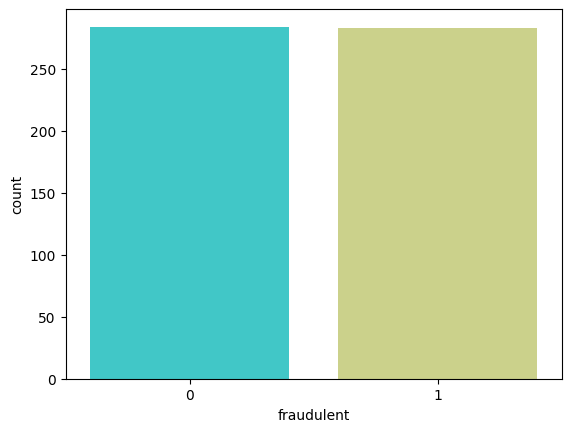

In [ ]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

<ipython-input-243-99d186893f5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

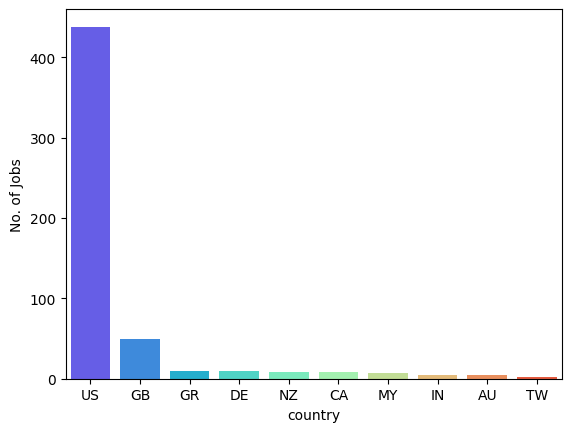

In [ ]:
country = df['country'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

<ipython-input-244-a2717cbc75a3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='employment_type', palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

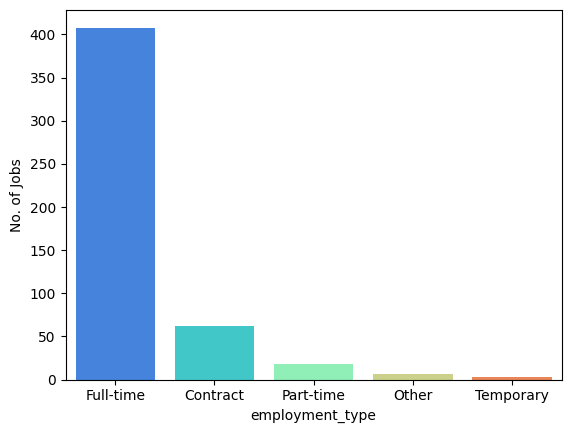

In [ ]:
ax=sns.countplot(data=df, x='employment_type', palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [ ]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,US
1,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1,US
2,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,US
3,574,Senior Engineering Product Manager,"US, CA, San Jose",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,Senior Engineering Product ManagerAs a member ...,Skills and Requirements MSEE with 5 years of e...,"What is offered:Broad responsibility, autonomy...",1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Networking,Engineering,1,US
4,604,Lead Mechanical Engineer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• Mech...,We offer• Friendly colleagues in an industry w...,1,Full-time,NaN,NaN,Oil & Energy,Engineering,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,332,Application Security Consultant,"US, ,",Professional Services,NaN,Cylance is a global cybersecurity products and...,SummaryImmediate requirement for an advanced s...,QualificationsBachelor degree in Information T...,NaN,1,NaN,NaN,NaN,NaN,NaN,0,US
563,333,TwiML Application Developer - Freelance (Contr...,"US, ,",NaN,NaN,The OneReach team is comprised of a diverse gr...,OneReach has an immediate need for freelance/c...,#NAME?,NaN,1,Contract,NaN,NaN,NaN,NaN,0,US
564,334,Senior Customer Care Advisor,"TR, 34, Istanbul",Customer Care,NaN,Our team is carefully balanced with the best s...,Goals:lanuch and maintain World Class services...,If you:are motivated by the possibility to ctr...,We offer:a chance to ‘make a dent in the Unive...,1,Full-time,Associate,Bachelor's Degree,Internet,Customer Service,0,TR
565,335,IT Consultant/Engineer Position Available,"US, NY, NY",NaN,40000-50000,NaN,"Our client, an established IT Consulting firm ...",NaN,NaN,1,Full-time,Entry level,NaN,Information Technology and Services,Information Technology,0,US


<ipython-input-246-1115eaf880f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='required_experience', palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

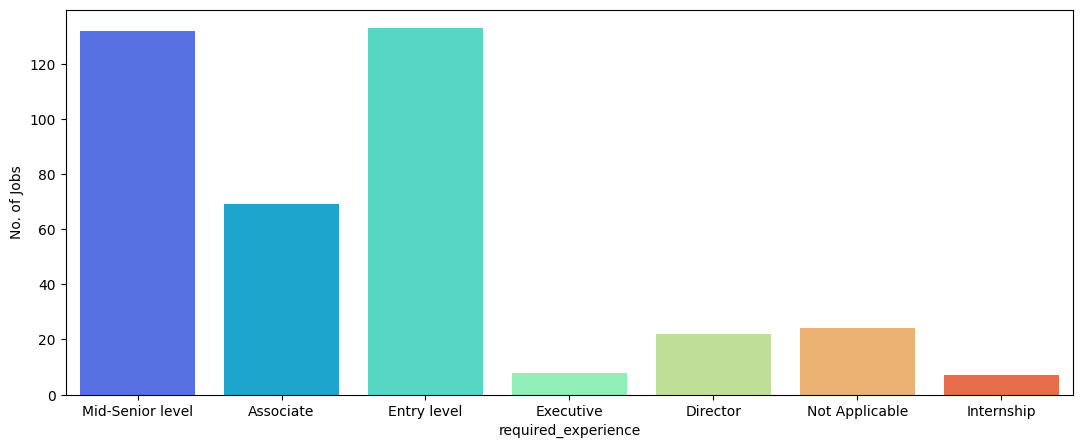

In [ ]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x='required_experience', palette='rainbow')
ax.set_ylabel('No. of Jobs')

<ipython-input-247-e1dcd49fd9d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

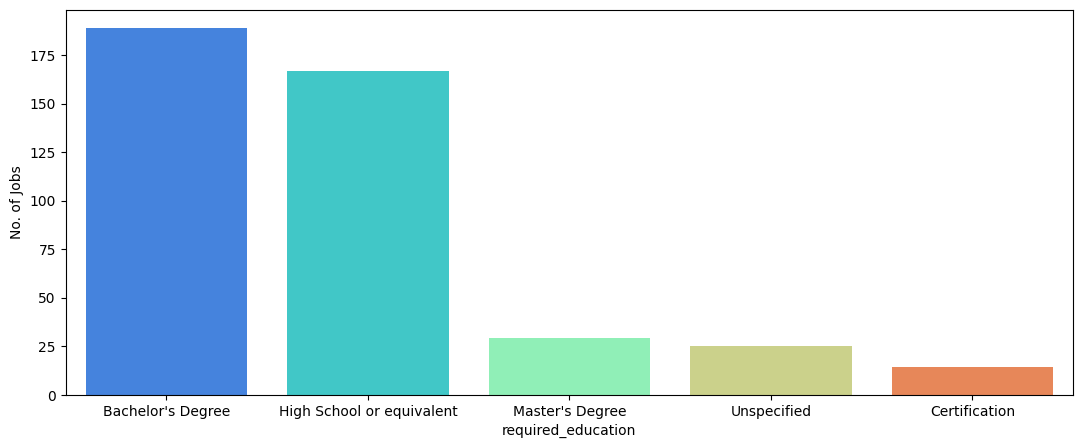

In [ ]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

### Fill những giá trị rỗng bằng ''

In [ ]:
df.fillna(' ',inplace=True)

In [ ]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
dtype: int64

In [ ]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,US
1,174,Technician Instrument & Controls,US,Power Plant & Energy,,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1,US
2,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,US
3,574,Senior Engineering Product Manager,"US, CA, San Jose",Engineering,,Aptitude Staffing Solutions has redesigned the...,Senior Engineering Product ManagerAs a member ...,Skills and Requirements MSEE with 5 years of e...,"What is offered:Broad responsibility, autonomy...",1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Networking,Engineering,1,US
4,604,Lead Mechanical Engineer,"US, TX, Houston",,,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• Mech...,We offer• Friendly colleagues in an industry w...,1,Full-time,,,Oil & Energy,Engineering,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,332,Application Security Consultant,"US, ,",Professional Services,,Cylance is a global cybersecurity products and...,SummaryImmediate requirement for an advanced s...,QualificationsBachelor degree in Information T...,,1,,,,,,0,US
563,333,TwiML Application Developer - Freelance (Contr...,"US, ,",,,The OneReach team is comprised of a diverse gr...,OneReach has an immediate need for freelance/c...,#NAME?,,1,Contract,,,,,0,US
564,334,Senior Customer Care Advisor,"TR, 34, Istanbul",Customer Care,,Our team is carefully balanced with the best s...,Goals:lanuch and maintain World Class services...,If you:are motivated by the possibility to ctr...,We offer:a chance to ‘make a dent in the Unive...,1,Full-time,Associate,Bachelor's Degree,Internet,Customer Service,0,TR
565,335,IT Consultant/Engineer Position Available,"US, NY, NY",,40000-50000,,"Our client, an established IT Consulting firm ...",,,1,Full-time,Entry level,,Information Technology and Services,Information Technology,0,US


In [ ]:
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)

In [ ]:
df

,job_id,has_company_logo,fraudulent,country,combined_text
0,99,1,1,US,"IC&E Technician US, , Stocton, CA 95000-115000..."
1,174,1,1,US,Technician Instrument & Controls US Edison ...
2,216,1,1,US,"IC&E Technician Mt Poso US, CA, Bakersfield, C..."
3,574,1,1,US,"Senior Engineering Product Manager US, CA, San..."
4,604,1,1,US,"Lead Mechanical Engineer US, TX, Houston Ake..."
...,...,...,...,...,...
562,332,1,0,US,"Application Security Consultant US, , Cylan..."
563,333,1,0,US,TwiML Application Developer - Freelance (Contr...
564,334,1,0,TR,"Senior Customer Care Advisor TR, 34, Istanbul ..."
565,335,1,0,US,"IT Consultant/Engineer Position Available US, ..."


In [ ]:
df.drop('country',axis=1,inplace=True)

In [ ]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,99,1,1,"IC&E Technician US, , Stocton, CA 95000-115000..."
1,174,1,1,Technician Instrument & Controls US Edison ...
2,216,1,1,"IC&E Technician Mt Poso US, CA, Bakersfield, C..."
3,574,1,1,"Senior Engineering Product Manager US, CA, San..."
4,604,1,1,"Lead Mechanical Engineer US, TX, Houston Ake..."


### Xử lý dữ liệu

In [ ]:
df.to_csv("real_fake_jobs.csv")

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [ ]:
df['combined_text']=df['combined_text'].apply(clean_text)

### Data Normalization

In [ ]:
nlp = spacy.load("en_core_web_sm")

def normalize_text(text):
    # Tokenize the text and apply lemmatization
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
df['combined_text']=df['combined_text'].apply(normalize_text)

In [ ]:
df

,job_id,has_company_logo,fraudulent,combined_text
0,99,1,1,ic e technician us stocton ca 95000 115000 sta...
1,174,1,1,technician instrument control us edison intern...
2,216,1,1,ic e technician mt poso we can bakersfield ca ...
3,574,1,1,senior engineering product manager we can san ...
4,604,1,1,lead mechanical engineer us tx houston aker so...
...,...,...,...,...
562,332,1,0,application security consultant us cylance glo...
563,333,1,0,twiml application developer freelance contract...
564,334,1,0,senior customer care advisor tr 34 istanbul te...
565,335,1,0,consultant engineer position available we ny n...


### Feature Extraction

In [ ]:
text_columns = ['combined_text']

df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)
df['pos_features'] = df['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))

X_train = df.drop('fraudulent', axis=1)
y_train = df['fraudulent']

vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = vectorizer.fit_transform(X_train['combined_text'])
pos_matrix_train = vectorizer.transform(X_train['pos_features'])
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

with open('countvectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

### Model

In [ ]:
X=combined_matrix_train
y=df['fraudulent'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

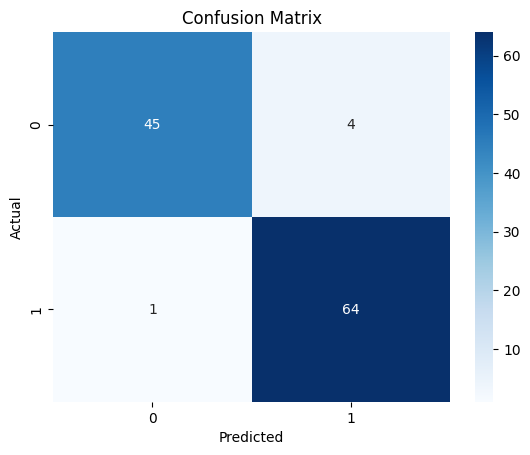

Cross-validation scores: [0.93406593 0.93406593 0.98901099 0.95555556 0.96666667]
Average cross-validation score: 0.9558730158730159
Test set accuracy: 0.956140350877193
Test set precision: 0.9411764705882353
Test set recall: 0.9846153846153847
Test set F1 score: 0.962406015037594


In [ ]:
model = LogisticRegression(max_iter=500)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

### SVC

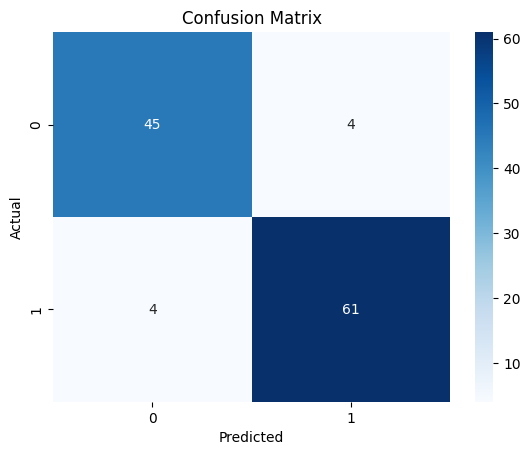

Cross-validation scores: [0.93406593 0.93406593 0.98901099 0.95555556 0.96666667]
Average cross-validation score: 0.9558730158730159
Test set accuracy: 0.9298245614035088
Test set precision: 0.9411764705882353
Test set recall: 0.9384615384615385
Test set F1 score: 0.9384615384615385


In [ ]:
model3 = SVC()
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

### Descision Tree

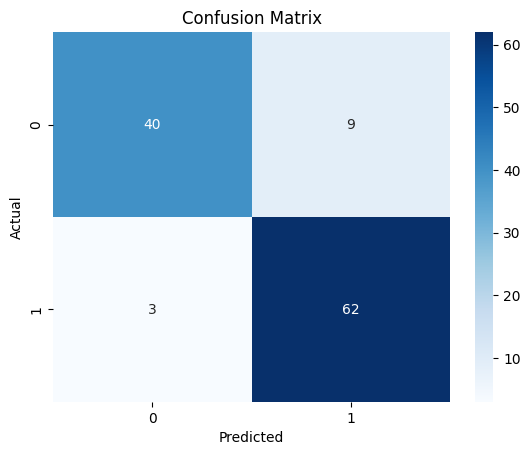

Cross-validation scores: [0.93406593 0.93406593 0.98901099 0.95555556 0.96666667]
Average cross-validation score: 0.9558730158730159
Test set accuracy: 0.8947368421052632
Test set precision: 0.9411764705882353
Test set recall: 0.9538461538461539
Test set F1 score: 0.9117647058823529


In [ ]:
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

Mô hình XGBoost

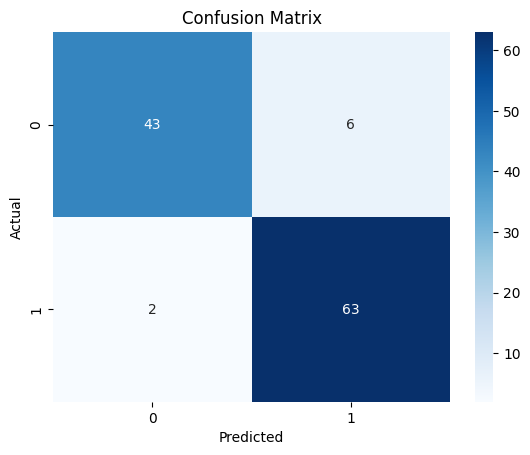

Cross-validation scores: [0.93406593 0.93406593 0.98901099 0.95555556 0.96666667]
Average cross-validation score: 0.9558730158730159
Test set accuracy: 0.9298245614035088
Test set precision: 0.9411764705882353
Test set recall: 0.9692307692307692
Test set F1 score: 0.9402985074626865


In [ ]:
import xgboost as xgb
model6 = xgb.XGBClassifier()
model6.fit(X_train, y_train)

y_pred6 = model6.predict(X_test)
accuracy = accuracy_score(y_test, y_pred6)
recall = recall_score(y_test, y_pred6)
f1 = f1_score(y_test, y_pred6)
cm = confusion_matrix(y_test, y_pred6)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

### Nhập dữ liệu vào để test mô hình

In [ ]:
df

,job_id,has_company_logo,fraudulent,combined_text,pos_features
0,99,1,1,ic e technician us stocton ca 95000 115000 sta...,NN NN JJ PRP VBP MD CD CD NN NN VBG VB JJ NN V...
1,174,1,1,technician instrument control us edison intern...,JJ NN NN PRP VBP JJ VBN NN NN NN NN VBG NN VBP...
2,216,1,1,ic e technician mt poso we can bakersfield ca ...,NN NN JJ NN IN PRP MD VB MD VB VB CD CD NN NN ...
3,574,1,1,senior engineering product manager we can san ...,JJ NN NN NN PRP MD VB JJ JJ NN NN NN VBG NNS J...
4,604,1,1,lead mechanical engineer us tx houston aker so...,JJ JJ NN PRP VBP JJ NN NN JJ NN NN NN NN NN NN...
...,...,...,...,...,...
562,332,1,0,application security consultant us cylance glo...,NN NN NN PRP NN JJ NN NN NN NN VB JJ NN NN VBP...
563,333,1,0,twiml application developer freelance contract...,JJ NN NN NN NN PRP VBP JJ NN NN NN JJ NNS VBP ...
564,334,1,0,senior customer care advisor tr 34 istanbul te...,JJ NN NN NN VBD CD NN NN RB VB JJ NN NN NN JJ ...
565,335,1,0,consultant engineer position available we ny n...,NN NN NN JJ PRP VBP RB CD CD NN VB VBG JJ NN J...


In [ ]:
# list of name, degree, score
job_id = [1]
has_company_logo = [1]
combined_text = ["ic e technician us stocton ca 95000 115000"]

# dictionary of lists
dict = {'job_id': job_id, 'has_company_logo': has_company_logo, 'combined_text': combined_text}

input_test = pd.DataFrame(dict)
input_test

,job_id,has_company_logo,combined_text
0,1,1,ic e technician us stocton ca 95000 115000


In [ ]:
text_columns = ['combined_text']

input_test['pos_features'] = input_test[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)
input_test['pos_features'] = input_test['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))

vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = vectorizer.fit_transform(input_test['combined_text'])
pos_matrix_train = vectorizer.transform(input_test['pos_features'])
vectorizer

CountVectorizer(ngram_range=(1, 2))

In [ ]:
text_columns = ['combined_text']

input_test['pos_features'] = input_test[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)
input_test['pos_features'] = input_test['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))

vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = vectorizer.fit_transform(input_test['combined_text'])
pos_matrix_train = vectorizer.transform(input_test['pos_features'])
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

with open('countvectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [ ]:
combined_matrix_train

<1x26 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred6 = model6.predict(combined_matrix_train)
y_pred6

ValueError: Feature shape mismatch, expected: 147454, got 26